# Exploring bodies

In [1]:
import pandas as pd

In [32]:
df = pd.read_csv("/Users/thearolskovsloth/data-science-x-am/output/body_descriptions.csv")
df.head(3)

,Unnamed: 0,bodypart,owner,owner_gender,description,ID,author_gender
0,0,hands,her,F,[],PG67640_text,F
1,1,lung,her,F,['left'],PG67640_text,F
2,2,face,her,F,[],PG67640_text,F


In [5]:
female_owners = df.loc[df['owner_gender']=="F"]
male_owners = df.loc[df['owner_gender']=="M"]

In [11]:
print("percentage part of male/female owners of bodyparts:", "female:", len(female_owners)/len(df)*100, "%", "and males:", len(male_owners)/len(df)*100, "%")

percentage part of male/female owners of bodyparts: female: 32.958942816654414 % and males: 67.04105718334559 %


In [24]:
print(len(female_owners.iloc[1,4]))

8


In [30]:
described_male_bodyparts = male_owners[male_owners['description'].str.len() > 2]
described_male_bodyparts.head(3)

described_female_bodyparts = female_owners[female_owners['description'].str.len() > 2]
described_female_bodyparts.head(3)

,Unnamed: 0,bodypart,owner,owner_gender,description,ID,author_gender
1,1,lung,her,F,['left'],PG67640_text,F
42,42,hair,her,F,['light'],PG66460_text,M
100,100,hair,her,F,['tailed'],PG65809_text,F


In [88]:
top100males = described_male_bodyparts['description'].value_counts()[:20].rename_axis('descriptive').reset_index(name='counts_male')
top100males = pd.DataFrame (top100males)

top100males.head()

,descriptive,counts_male
0,['own'],2597
1,['right'],2147
2,['left'],1907
3,['long'],696
4,['white'],573


In [119]:
top100females = described_female_bodyparts['description'].value_counts()[:20].rename_axis('descriptive').reset_index(name='counts_female')
top100females = pd.DataFrame (top100females)
print(top100females.iloc[1,1])
top100females.head()

661


,descriptive,counts_female
0,['own'],981
1,['white'],661
2,['dark'],528
3,['little'],476
4,['brown'],414


In [90]:
#merge
adjectives = pd.merge(top100females, top100males, on=['descriptive'])
adjectives.tail()

,descriptive,counts_female,counts_male
9,['bare'],318,419
10,['red'],261,363
11,['whole'],212,400
12,['long'],194,696
13,['thin'],187,402


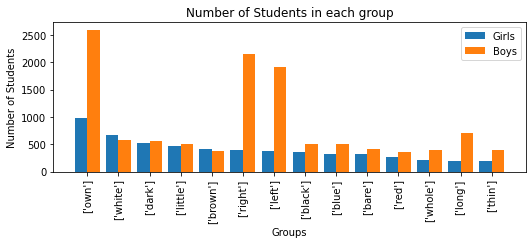

In [103]:
#skal standardiseres
import numpy as np 
import matplotlib.pyplot as plt 
import re

X = list(adjectives['descriptive'])
Ygirls = list(adjectives['counts_female'])
Zboys = list(adjectives['counts_male'])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X,rotation=90)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [125]:
#prepare file
word_list_female = []
word_list_male = []
def repeat(word, n):
    
    repeat_word = word[:]
    result = ""

    for i in range(n):
        result = result + " " + repeat_word

    word_list_male.append(result)

for w in range(1,len(top100females)):
    stripped_w = re.sub(r'[^a-zA-Z]', '', str(top100females.iloc[w,0]))
    repeat(stripped_w, top100females.iloc[w,1])

words_male=' '.join(map(str,word_list_male))
words_female=' '.join(map(str,word_list_female))

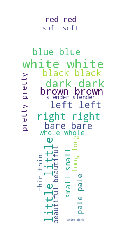

In [126]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

mask_male = np.array(Image.open(r'/Users/thearolskovsloth/Downloads/male.jpg'))

male_cloud = WordCloud(stopwords = STOPWORDS,
               mask = mask_male, background_color = "white",
               max_words = 20, max_font_size = 500,
               random_state = 42, width = mask_male.shape[1],
               height = mask_male.shape[0])

male_cloud.generate(words_male)
plt.imshow(male_cloud, interpolation="None")
plt.axis('off')
plt.show()

In [ ]:
mask_female = np.array(Image.open(r'/Users/thearolskovsloth/Downloads/female.jpg'))